In [1]:
import pickle
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pickle
from gplearn.genetic import SymbolicClassifier
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from io import StringIO
from IPython.display import Image
import pandas as pd

In [2]:
v1 = pd.DataFrame(pd.DataFrame(pd.read_csv('TrainTest-variables.csv')).iloc[:,0])
v1.to_csv('v1.csv',index=False)
v1

,Name
0,LiLiGeFFFF
1,LiLiGeFFFF
2,LiLiGeFFFF
3,LiLiGeFFFF
4,LiLiGeFFFF
...,...
635,RbRbSnClClII
636,RbRbSnClClII
637,RbRbSnClClII
638,RbRbSnClClII


In [3]:
v2 = pd.DataFrame(pd.DataFrame(pd.read_csv('TrainTest-variables.csv')).iloc[:,1])
v2.to_csv('v2.csv')
v2

,Ion
0,Li+
1,Zn2+
2,K+
3,Na+
4,Al3+
...,...
635,Na+
636,Al3+
637,Ca2+
638,Mg2+


In [4]:
vout = pd.DataFrame(pd.DataFrame(pd.read_csv('TrainTest-variables.csv')).iloc[:,-1])
vout.to_csv('vout.csv',index=False)
vout

,Adsorption energy(ev)
0,-7.004905
1,0.395232
2,-6.580689
3,-5.557395
4,2.608437
...,...
635,-1.934356
636,-0.151069
637,-4.757395
638,-0.462000


In [5]:
mats = v1.iloc[:,0].values.tolist()
mats
import re
def tokenize_formula(formula):
    return re.findall('[A-Z][a-z]?|\d+|.', formula)
df1=pd.DataFrame()
import warnings
warnings.filterwarnings("ignore")
for formula in mats:
    tokenized = tokenize_formula(formula)
    df1 = df1.append({'Formula': formula, 'Tokenized_Formula': tokenized}, ignore_index=True)  
# 使用 pd.Series() 将列表拆分成不同的列
df_elements1 = df1['Tokenized_Formula'].apply(pd.Series)
# 重命名列名
df_elements1.columns = [f'Element_{i+1}' for i in range(df_elements1.shape[1])]
# 合并到原始 DataFrame
df6 = pd.concat([df1, df_elements1], axis=1)
v1_split=pd.DataFrame(df6.iloc[:,2:])
v1_split.to_csv('v1_split.csv',index=False)
v1_split

,Element_1,Element_2,Element_3,Element_4,Element_5,Element_6,Element_7
0,Li,Li,Ge,F,F,F,F
1,Li,Li,Ge,F,F,F,F
2,Li,Li,Ge,F,F,F,F
3,Li,Li,Ge,F,F,F,F
4,Li,Li,Ge,F,F,F,F
...,...,...,...,...,...,...,...
635,Rb,Rb,Sn,Cl,Cl,I,I
636,Rb,Rb,Sn,Cl,Cl,I,I
637,Rb,Rb,Sn,Cl,Cl,I,I
638,Rb,Rb,Sn,Cl,Cl,I,I


In [6]:
mats = v2.iloc[:,0].values.tolist()
mats
import re
def tokenize_formula(formula):
    return re.findall('[A-Z][a-z]?|\d+|.', formula)
df1=pd.DataFrame()
import warnings
warnings.filterwarnings("ignore")
for formula in mats:
    tokenized = tokenize_formula(formula)
    df1 = df1.append({'Formula': formula, 'Tokenized_Formula': tokenized}, ignore_index=True)  
# 使用 pd.Series() 将列表拆分成不同的列
df_elements1 = df1['Tokenized_Formula'].apply(pd.Series)
# 重命名列名
df_elements1.columns = [f'Element_b{i+1}' for i in range(df_elements1.shape[1])]
# 合并到原始 DataFrame
df6 = pd.concat([df1, df_elements1], axis=1)
v2_split = pd.DataFrame(df6.iloc[:,2:-2])
v2_split.columns = ['ion']
v2_split.to_csv('v2_split.csv',index=False)
v2_split

,ion
0,Li
1,Zn
2,K
3,Na
4,Al
...,...
635,Na
636,Al
637,Ca
638,Mg


In [38]:
v = pd.concat([v1_split, v2_split], axis=1)
v.to_csv('v.csv',index=False)
v

,Element_1,Element_2,Element_3,Element_4,Element_5,Element_6,Element_7,ion
0,Li,Li,Ge,F,F,F,F,Li
1,Li,Li,Ge,F,F,F,F,Zn
2,Li,Li,Ge,F,F,F,F,K
3,Li,Li,Ge,F,F,F,F,Na
4,Li,Li,Ge,F,F,F,F,Al
...,...,...,...,...,...,...,...,...
635,Rb,Rb,Sn,Cl,Cl,I,I,Na
636,Rb,Rb,Sn,Cl,Cl,I,I,Al
637,Rb,Rb,Sn,Cl,Cl,I,I,Ca
638,Rb,Rb,Sn,Cl,Cl,I,I,Mg


In [35]:
merge = v
merge['Name'] = merge.apply(lambda row: ''.join(map(str, row)), axis=1)
merge = pd.DataFrame(merge.iloc[:,-1])
# 显示结果
merge.to_csv('merge.csv',index=False)
merge

,Name
0,LiLiGeFFFFLi
1,LiLiGeFFFFZn
2,LiLiGeFFFFK
3,LiLiGeFFFFNa
4,LiLiGeFFFFAl
...,...
635,RbRbSnClClIINa
636,RbRbSnClClIIAl
637,RbRbSnClClIICa
638,RbRbSnClClIIMg


下面开始算容忍因子和八面体因子

In [28]:
# 元素到半径的映射字典（示例）
radius_dict = {
    'Li': 76, 'Na': 102.0, 'K': 138.0, 'Rb': 152.0, 'Cs': 167.0,
    'Ge': 73, 'Sn': 112, 'Pb': 119,
    'F': 133.0, 'Cl': 181.0 , 'Br': 196.0  , 'I': 220.00000000000003
}
# 使用字典将DataFrame中的元素替换为半径
v1_split_radius = v1_split.replace(radius_dict)
v1_split_radius.to_csv('v1_split_radius.csv', index=False)
v1_split_radius

,Element_1,Element_2,Element_3,Element_4,Element_5,Element_6,Element_7
0,76.0,76.0,73,133.0,133.0,133.0,133.0
1,76.0,76.0,73,133.0,133.0,133.0,133.0
2,76.0,76.0,73,133.0,133.0,133.0,133.0
3,76.0,76.0,73,133.0,133.0,133.0,133.0
4,76.0,76.0,73,133.0,133.0,133.0,133.0
...,...,...,...,...,...,...,...
635,152.0,152.0,112,181.0,181.0,220.0,220.0
636,152.0,152.0,112,181.0,181.0,220.0,220.0
637,152.0,152.0,112,181.0,181.0,220.0,220.0
638,152.0,152.0,112,181.0,181.0,220.0,220.0


In [29]:
# 定义计算八面体因子的函数（针对 A2BX4 钙钛矿）
def calculate_octahedral_factor(row):
    r_B = row.iloc[2]  # 第三个元素为 X1 的离子半径
    r_X1 = row.iloc[3]  # 第x个元素为 X2 的离子半径
    r_X2 = row.iloc[4]  # 第x个元素为 X2 的离子半径
    r_X3 = row.iloc[5]  # 第x个元素为 X2 的离子半径
    r_X4 = row.iloc[6]  # 第x个元素为 X2 的离子半径
    
    # 计算两个 X 离子的平均值作为八面体因子的计算值
    octahedral_factor = r_B / (r_X1 + r_X2 + r_X3 + r_X4) * 4
    return octahedral_factor

# 将函数应用于 DataFrame 的不同行元素上，生成新列'Octahedral Factor'
octahedral_factor = v1_split_radius
octahedral_factor['Octahedral Factor'] = octahedral_factor.apply(calculate_octahedral_factor, axis=1)

# 显示结果
octahedral_factor.to_csv('octahedral_factor.csv', index=False)
octahedral_factor

,Element_1,Element_2,Element_3,Element_4,Element_5,Element_6,Element_7,Octahedral Factor
0,76.0,76.0,73,133.0,133.0,133.0,133.0,0.548872
1,76.0,76.0,73,133.0,133.0,133.0,133.0,0.548872
2,76.0,76.0,73,133.0,133.0,133.0,133.0,0.548872
3,76.0,76.0,73,133.0,133.0,133.0,133.0,0.548872
4,76.0,76.0,73,133.0,133.0,133.0,133.0,0.548872
...,...,...,...,...,...,...,...,...
635,152.0,152.0,112,181.0,181.0,220.0,220.0,0.558603
636,152.0,152.0,112,181.0,181.0,220.0,220.0,0.558603
637,152.0,152.0,112,181.0,181.0,220.0,220.0,0.558603
638,152.0,152.0,112,181.0,181.0,220.0,220.0,0.558603


In [30]:
# 定义计算容忍因子的函数（针对 A2BX4 钙钛矿）
def calculate_tolerance_factor(row):
    r_A1 = row.iloc[0]  # 第x个元素为 X1 的离子半径
    r_A2 = row.iloc[1]  # 第x个元素为 X1 的离子半径
    r_B = row.iloc[2]  # 第x个元素为 X1 的离子半径
    r_X1 = row.iloc[3]  # 第x个元素为 X2 的离子半径
    r_X2 = row.iloc[4]  # 第x个元素为 X2 的离子半径
    r_X3 = row.iloc[5]  # 第x个元素为 X2 的离子半径
    r_X4 = row.iloc[6]  # 第x个元素为 X2 的离子半径
    
    RA = (r_A1 + r_A2) / 2
    RB = r_B
    RX = (r_X1 + r_X2 + r_X3 + r_X4) / 4
    return (RA + RX) / (2**0.5 * (RB + RX))

# 将函数应用于DataFrame的不同行元素上，生成新列'Tolerance Factor'
tolerance_factor = v1_split_radius
tolerance_factor['Tolerance Factor'] = tolerance_factor.apply(calculate_tolerance_factor, axis=1)

# 显示结果
tolerance_factor.to_csv('tolerance_factor.csv', index=False)
tolerance_factor

,Element_1,Element_2,Element_3,Element_4,Element_5,Element_6,Element_7,Octahedral Factor,Tolerance Factor
0,76.0,76.0,73,133.0,133.0,133.0,133.0,0.548872,0.717404
1,76.0,76.0,73,133.0,133.0,133.0,133.0,0.548872,0.717404
2,76.0,76.0,73,133.0,133.0,133.0,133.0,0.548872,0.717404
3,76.0,76.0,73,133.0,133.0,133.0,133.0,0.548872,0.717404
4,76.0,76.0,73,133.0,133.0,133.0,133.0,0.548872,0.717404
...,...,...,...,...,...,...,...,...,...
635,152.0,152.0,112,181.0,181.0,220.0,220.0,0.558603,0.797616
636,152.0,152.0,112,181.0,181.0,220.0,220.0,0.558603,0.797616
637,152.0,152.0,112,181.0,181.0,220.0,220.0,0.558603,0.797616
638,152.0,152.0,112,181.0,181.0,220.0,220.0,0.558603,0.797616


In [31]:
Octahedral_Tolerance =  pd.DataFrame(tolerance_factor.iloc[:,-2:])
Octahedral_Tolerance.to_csv('Octahedral_Tolerance.csv', index=False)
Octahedral_Tolerance.to_csv('0_Octahedral_Tolerance.csv', index=False)
Octahedral_Tolerance

,Octahedral Factor,Tolerance Factor
0,0.548872,0.717404
1,0.548872,0.717404
2,0.548872,0.717404
3,0.548872,0.717404
4,0.548872,0.717404
...,...,...
635,0.558603,0.797616
636,0.558603,0.797616
637,0.558603,0.797616
638,0.558603,0.797616


In [36]:
import matminer
from matminer.featurizers.conversions import StrToComposition
from matminer.featurizers.composition import ElementProperty
import pandas as pd

str_to_comp = StrToComposition(target_col_id='composition')
df_comp = str_to_comp.featurize_dataframe(merge, col_id='Name')

from matminer.featurizers.composition.orbital import AtomicOrbitals
comp_to_Orbital = AtomicOrbitals()
AtomicOrbitals = comp_to_Orbital.featurize_dataframe(df_comp,col_id='composition')
AtomicOrbitals = AtomicOrbitals.iloc[:,[4,7,8]]   # data.iloc[ : , [1,2,3] ]  取所有行和第1,2,3列交叉的所有的数据
AtomicOrbitals.to_csv('1_AtomicOrbitals.csv', index=False)
AtomicOrbitals

StrToComposition:   0%|          | 0/640 [00:00<?, ?it/s]

AtomicOrbitals:   0%|          | 0/640 [00:00<?, ?it/s]

,HOMO_energy,LUMO_energy,gap_AO
0,-0.149882,-0.149882,0.000000
1,-0.222725,-0.149882,0.072843
2,-0.149882,-0.149882,0.000000
3,-0.149882,-0.149882,0.000000
4,-0.149882,-0.149882,0.000000
...,...,...,...
635,-0.144450,-0.144450,0.000000
636,-0.144450,-0.144450,0.000000
637,-0.144450,-0.144450,0.000000
638,-0.175427,-0.144450,0.030977


In [39]:
import logging
import gensim
from gensim.models import word2vec, KeyedVectors
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
# from chemdataextractor import Document
# import pkuseg
import numpy as np
from nltk.tokenize import MWETokenizer
import itertools
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from sklearn.manifold import TSNE


ele = v


model = KeyedVectors.load_word2vec_format('model.txt')




def cos(x):
    return model.similarity(x, 'battery')
# 对DataFrame中的每个元素应用这个函数
battery = ele.applymap(cos)
battery = battery.add_prefix('battery_')
# 打印处理后的DataFrame
battery.to_csv('battery.csv')
battery


def cos(x):
    return model.similarity(x, 'stable')
# 对DataFrame中的每个元素应用这个函数
stable = ele.applymap(cos)
stable = stable.add_prefix('stable_')
# 打印处理后的DataFrame
stable.to_csv('stable.csv')
stable

def cos(x):
    return model.similarity(x, 'unstable')
# 对DataFrame中的每个元素应用这个函数
unstable = ele.applymap(cos)
unstable = unstable.add_prefix('unstable_')
# 打印处理后的DataFrame
unstable.to_csv('unstable.csv')
unstable

def cos(x):
    return model.similarity(x, 'solar')
# 对DataFrame中的每个元素应用这个函数
solar = ele.applymap(cos)
solar = solar.add_prefix('solar_')
# 打印处理后的DataFrame
solar.to_csv('solar.csv')
solar

def cos(x):
    return model.similarity(x, 'photo')
# 对DataFrame中的每个元素应用这个函数
photo = ele.applymap(cos)
photo = photo.add_prefix('photo_')
# 打印处理后的DataFrame
photo.to_csv('photo.csv')
photo

def cos(x):
    return model.similarity(x, 'rechargeable')
# 对DataFrame中的每个元素应用这个函数
rechargeable = ele.applymap(cos)
rechargeable = rechargeable.add_prefix('rechargeable_')
# 打印处理后的DataFrame
rechargeable.to_csv('rechargeable.csv')
rechargeable

def cos(x):
    return model.similarity(x, 'adsorption')
# 对DataFrame中的每个元素应用这个函数
adsorption = ele.applymap(cos)
adsorption = adsorption.add_prefix('adsorption_')
# 打印处理后的DataFrame
adsorption.to_csv('adsorption.csv')
adsorption

def cos(x):
    return model.similarity(x, 'diffusion')
# 对DataFrame中的每个元素应用这个函数
diffusion = ele.applymap(cos)
diffusion = diffusion.add_prefix('diffusion_')
# 打印处理后的DataFrame
diffusion.to_csv('diffusion.csv')
diffusion

def cos(x):
    return model.similarity(x, 'intercalation')
# 对DataFrame中的每个元素应用这个函数
intercalation = ele.applymap(cos)
intercalation = intercalation.add_prefix('intercalation_')
# 打印处理后的DataFrame
intercalation.to_csv('intercalation.csv')
intercalation

NLP = pd.concat([battery, stable, unstable, solar, photo,rechargeable, adsorption, diffusion, intercalation], axis=1)
NLP.to_csv('2_NLP.csv', index=False)
NLP

,battery_Element_1,battery_Element_2,battery_Element_3,battery_Element_4,battery_Element_5,battery_Element_6,battery_Element_7,battery_ion,stable_Element_1,stable_Element_2,...,diffusion_Element_7,diffusion_ion,intercalation_Element_1,intercalation_Element_2,intercalation_Element_3,intercalation_Element_4,intercalation_Element_5,intercalation_Element_6,intercalation_Element_7,intercalation_ion
0,0.566983,0.566983,0.224103,0.307130,0.307130,0.30713,0.30713,0.566983,0.366833,0.366833,...,0.141869,0.522291,0.685340,0.685340,0.394125,0.242116,0.242116,0.242116,0.242116,0.685340
1,0.566983,0.566983,0.224103,0.307130,0.307130,0.30713,0.30713,0.501624,0.366833,0.366833,...,0.141869,0.238286,0.685340,0.685340,0.394125,0.242116,0.242116,0.242116,0.242116,0.438664
2,0.566983,0.566983,0.224103,0.307130,0.307130,0.30713,0.30713,0.167597,0.366833,0.366833,...,0.141869,0.310092,0.685340,0.685340,0.394125,0.242116,0.242116,0.242116,0.242116,0.374328
3,0.566983,0.566983,0.224103,0.307130,0.307130,0.30713,0.30713,0.446715,0.366833,0.366833,...,0.141869,0.454071,0.685340,0.685340,0.394125,0.242116,0.242116,0.242116,0.242116,0.592620
4,0.566983,0.566983,0.224103,0.307130,0.307130,0.30713,0.30713,0.326105,0.366833,0.366833,...,0.141869,0.206794,0.685340,0.685340,0.394125,0.242116,0.242116,0.242116,0.242116,0.314987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.289049,0.289049,0.385399,0.184057,0.184057,0.14323,0.14323,0.446715,0.383886,0.383886,...,0.164216,0.454071,0.530488,0.530488,0.597745,0.388983,0.388983,0.157023,0.157023,0.592620
636,0.289049,0.289049,0.385399,0.184057,0.184057,0.14323,0.14323,0.326105,0.383886,0.383886,...,0.164216,0.206794,0.530488,0.530488,0.597745,0.388983,0.388983,0.157023,0.157023,0.314987
637,0.289049,0.289049,0.385399,0.184057,0.184057,0.14323,0.14323,0.235454,0.383886,0.383886,...,0.164216,0.297734,0.530488,0.530488,0.597745,0.388983,0.388983,0.157023,0.157023,0.419923
638,0.289049,0.289049,0.385399,0.184057,0.184057,0.14323,0.14323,0.324145,0.383886,0.383886,...,0.164216,0.233388,0.530488,0.530488,0.597745,0.388983,0.388983,0.157023,0.157023,0.501658


In [40]:
features = ['Number', 'MendeleevNumber', 'AtomicWeight', 'MeltingT', 
            'Column', 'Row', 'CovalentRadius', 'Electronegativity', 
            'NsValence', 'NpValence', 'NdValence', 'NfValence', 'NValence', 
            'NsUnfilled', 'NpUnfilled', 'NdUnfilled', 'NfUnfilled', 'NUnfilled', 
            'GSvolume_pa', 'GSbandgap', 'GSmagmom', 'SpaceGroupNumber']

stats = ['mean','minimum', 'maximum', 'range', 'avg_dev', 'mode']

featurizer = ElementProperty(data_source='magpie',
                             features=features,
                             stats=stats)

df_comp = str_to_comp.featurize_dataframe(v1, col_id='Name')
df_features = featurizer.featurize_dataframe(df_comp, col_id='composition')
df_features=df_features.iloc[:,2:-1] 
df_features.to_csv('3_magpie.csv', index=False)
df_features

StrToComposition:   0%|          | 0/640 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/640 [00:00<?, ?it/s]

,MagpieData mean Number,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData mean MendeleevNumber,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,MagpieData minimum GSmagmom,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData mean SpaceGroupNumber,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber
0,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,106.142857,15.0,229.0,214.0,104.163265
1,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,106.142857,15.0,229.0,214.0,104.163265
2,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,106.142857,15.0,229.0,214.0,104.163265
3,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,106.142857,15.0,229.0,214.0,104.163265
4,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,106.142857,15.0,229.0,214.0,104.163265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,37.714286,17.0,53.0,36.0,12.244898,17.0,66.857143,4.0,96.0,92.0,...,0.0,0.0,0.0,0.0,0.0,122.142857,64.0,229.0,165.0,66.448980
636,37.714286,17.0,53.0,36.0,12.244898,17.0,66.857143,4.0,96.0,92.0,...,0.0,0.0,0.0,0.0,0.0,122.142857,64.0,229.0,165.0,66.448980
637,37.714286,17.0,53.0,36.0,12.244898,17.0,66.857143,4.0,96.0,92.0,...,0.0,0.0,0.0,0.0,0.0,122.142857,64.0,229.0,165.0,66.448980
638,37.714286,17.0,53.0,36.0,12.244898,17.0,66.857143,4.0,96.0,92.0,...,0.0,0.0,0.0,0.0,0.0,122.142857,64.0,229.0,165.0,66.448980


In [41]:
from pymatgen.core import Composition
from matminer.featurizers.composition.element import ElementFraction
ef = ElementFraction()
df_comp = str_to_comp.featurize_dataframe(merge, col_id='Name')
onehot = ef.featurize_dataframe(df_comp, "composition")
onehot = onehot.iloc[:,2:-1]  
onehot.to_csv('4_onehot.csv', index=False)
onehot

StrToComposition:   0%|          | 0/640 [00:00<?, ?it/s]

ElementFraction:   0%|          | 0/640 [00:00<?, ?it/s]

,H,He,Li,Be,B,C,N,O,F,Ne,...,Np,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No
0,0,0,0.375,0,0,0,0,0,0.500,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0.250,0,0,0,0,0,0.500,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0.250,0,0,0,0,0,0.500,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0.250,0,0,0,0,0,0.500,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0.250,0,0,0,0,0,0.500,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0,0,0.000,0,0,0,0,0,0.000,0,...,0,0,0,0,0,0,0,0,0,0
636,0,0,0.000,0,0,0,0,0,0.000,0,...,0,0,0,0,0,0,0,0,0,0
637,0,0,0.000,0,0,0,0,0,0.000,0,...,0,0,0,0,0,0,0,0,0,0
638,0,0,0.000,0,0,0,0,0,0.000,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
data = pd.concat([Octahedral_Tolerance, AtomicOrbitals, NLP, df_features, onehot, vout], axis=1)
data.to_csv('data.csv', index=False)
data

,Octahedral Factor,Tolerance Factor,HOMO_energy,LUMO_energy,gap_AO,battery_Element_1,battery_Element_2,battery_Element_3,battery_Element_4,battery_Element_5,...,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Adsorption energy(ev)
0,0.548872,0.717404,-0.149882,-0.149882,0.000000,0.566983,0.566983,0.224103,0.307130,0.307130,...,0,0,0,0,0,0,0,0,0,-7.004905
1,0.548872,0.717404,-0.222725,-0.149882,0.072843,0.566983,0.566983,0.224103,0.307130,0.307130,...,0,0,0,0,0,0,0,0,0,0.395232
2,0.548872,0.717404,-0.149882,-0.149882,0.000000,0.566983,0.566983,0.224103,0.307130,0.307130,...,0,0,0,0,0,0,0,0,0,-6.580689
3,0.548872,0.717404,-0.149882,-0.149882,0.000000,0.566983,0.566983,0.224103,0.307130,0.307130,...,0,0,0,0,0,0,0,0,0,-5.557395
4,0.548872,0.717404,-0.149882,-0.149882,0.000000,0.566983,0.566983,0.224103,0.307130,0.307130,...,0,0,0,0,0,0,0,0,0,2.608437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.558603,0.797616,-0.144450,-0.144450,0.000000,0.289049,0.289049,0.385399,0.184057,0.184057,...,0,0,0,0,0,0,0,0,0,-1.934356
636,0.558603,0.797616,-0.144450,-0.144450,0.000000,0.289049,0.289049,0.385399,0.184057,0.184057,...,0,0,0,0,0,0,0,0,0,-0.151069
637,0.558603,0.797616,-0.144450,-0.144450,0.000000,0.289049,0.289049,0.385399,0.184057,0.184057,...,0,0,0,0,0,0,0,0,0,-4.757395
638,0.558603,0.797616,-0.175427,-0.144450,0.030977,0.289049,0.289049,0.385399,0.184057,0.184057,...,0,0,0,0,0,0,0,0,0,-0.462000


In [43]:
# 使用随机森林的rfe:RandomForestRegressor()
from sklearn import preprocessing
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble import RandomForestRegressor
import csv
import numpy as np

# 输入数据归一化
X = data.values[:, :-1]
for i in range(X.shape[1]):
    X[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X[:, [i]])
y = data.values[:, -1]  # 目标数值

# rfe步骤
remain_number = 13
model = RandomForestRegressor()
rfe = RFE(estimator=model, n_features_to_select=remain_number, step=1)
rfe_X = rfe.fit_transform(X, y)
print("特征是否被选中：\n", rfe.support_)                                          # ndarray
print("获取的数据特征尺寸:", rfe_X.shape)                                           # tuple
list1 = rfe.support_.tolist()

# 打印rfe后的特征，但可能包含空值
import pandas as pd
Features_0 = pd.DataFrame(data=data.iloc[:, :-1].columns, columns=['Features'])
Features_0
Features_rfe = pd.DataFrame(data=rfe.support_, columns=['whether selected'])
Features_rfe
#     pd.options.display.max_rows=None
p = pd.concat([Features_0, Features_rfe], axis=1)
q = p[p['whether selected']>0]
r = q.reset_index(drop=True)
global s_rfe
s_rfe = pd.DataFrame(data=data,columns=r.Features.values)
global target
target = pd.DataFrame(data=data.iloc[:,-1])
# target = pd.DataFrame(data, columns=['Potential (v)'])
global data_rfe
data_rfe = pd.concat([s_rfe,target], axis=1)
print("最后的特征s_rfe:", r.Features.values)                                        # ndarray
print("目标target:", target)
print("rfe后的总数据data_rfe:", data_rfe)

list2 = r.Features.values.tolist()

# print全输出
with open("data.txt", "w") as f:
    #f.write("特征是否被选中：\n")
    f.write("Whether the feature is selected:\n")
    for i in range(len(list1)):
        f.write(str(list1[i])+' ')
    #f.write("\n获取的数据特征尺寸：\n")
    f.write("\nAcquired data feature size:\n")
    f.write('(%s,%s)' % rfe_X.shape)
    #f.write("\n最后的特征s_rfe：\n")
    f.write("\nS_rfe(Final feature)：\n")
    for i in range(len(list2)):
        f.write(str(list2[i]) + '\n')
target.to_csv("target.csv")
data_rfe.to_csv("data_rfe.csv")

特征是否被选中：
 [False  True  True  True False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
  True False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False  True
 False False False False False  True False False False False False  True
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False Fals

In [44]:
data_rfe

,Tolerance Factor,HOMO_energy,LUMO_energy,stable_ion,solar_ion,photo_ion,MagpieData mean AtomicWeight,MagpieData mean Row,MagpieData mean CovalentRadius,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mean GSvolume_pa,F,Adsorption energy(ev)
0,0.717404,-0.149882,-0.149882,0.366833,0.245629,0.213698,23.216516,2.285714,86.285714,2.841429,1.301224,13.574524,0.500,-7.004905
1,0.717404,-0.222725,-0.149882,0.315976,0.211353,0.285988,23.216516,2.285714,86.285714,2.841429,1.301224,13.574524,0.500,0.395232
2,0.717404,-0.149882,-0.149882,0.287042,0.212190,0.240783,23.216516,2.285714,86.285714,2.841429,1.301224,13.574524,0.500,-6.580689
3,0.717404,-0.149882,-0.149882,0.381328,0.263281,0.248083,23.216516,2.285714,86.285714,2.841429,1.301224,13.574524,0.500,-5.557395
4,0.717404,-0.149882,-0.149882,0.241039,0.246650,0.313555,23.216516,2.285714,86.285714,2.841429,1.301224,13.574524,0.500,2.608437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.797616,-0.144450,-0.144450,0.381328,0.263281,0.248083,87.765791,4.428571,151.571429,2.177143,0.837551,49.965000,0.000,-1.934356
636,0.797616,-0.144450,-0.144450,0.241039,0.246650,0.313555,87.765791,4.428571,151.571429,2.177143,0.837551,49.965000,0.000,-0.151069
637,0.797616,-0.144450,-0.144450,0.336066,0.178890,0.179321,87.765791,4.428571,151.571429,2.177143,0.837551,49.965000,0.000,-4.757395
638,0.797616,-0.175427,-0.144450,0.415391,0.097620,0.164341,87.765791,4.428571,151.571429,2.177143,0.837551,49.965000,0.000,-0.462000


In [45]:
s_rfe

,Tolerance Factor,HOMO_energy,LUMO_energy,stable_ion,solar_ion,photo_ion,MagpieData mean AtomicWeight,MagpieData mean Row,MagpieData mean CovalentRadius,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mean GSvolume_pa,F
0,0.717404,-0.149882,-0.149882,0.366833,0.245629,0.213698,23.216516,2.285714,86.285714,2.841429,1.301224,13.574524,0.500
1,0.717404,-0.222725,-0.149882,0.315976,0.211353,0.285988,23.216516,2.285714,86.285714,2.841429,1.301224,13.574524,0.500
2,0.717404,-0.149882,-0.149882,0.287042,0.212190,0.240783,23.216516,2.285714,86.285714,2.841429,1.301224,13.574524,0.500
3,0.717404,-0.149882,-0.149882,0.381328,0.263281,0.248083,23.216516,2.285714,86.285714,2.841429,1.301224,13.574524,0.500
4,0.717404,-0.149882,-0.149882,0.241039,0.246650,0.313555,23.216516,2.285714,86.285714,2.841429,1.301224,13.574524,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.797616,-0.144450,-0.144450,0.381328,0.263281,0.248083,87.765791,4.428571,151.571429,2.177143,0.837551,49.965000,0.000
636,0.797616,-0.144450,-0.144450,0.241039,0.246650,0.313555,87.765791,4.428571,151.571429,2.177143,0.837551,49.965000,0.000
637,0.797616,-0.144450,-0.144450,0.336066,0.178890,0.179321,87.765791,4.428571,151.571429,2.177143,0.837551,49.965000,0.000
638,0.797616,-0.175427,-0.144450,0.415391,0.097620,0.164341,87.765791,4.428571,151.571429,2.177143,0.837551,49.965000,0.000


In [46]:
target

,Adsorption energy(ev)
0,-7.004905
1,0.395232
2,-6.580689
3,-5.557395
4,2.608437
...,...
635,-1.934356
636,-0.151069
637,-4.757395
638,-0.462000


In [47]:
X = data_rfe.values[:, :-1]
y = data_rfe.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)


for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])



for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [48]:
feature_names = list(data_rfe.columns[:-1])

In [53]:
# 定义符号回归模型，并使用训练数据拟合模型
from gplearn.genetic import SymbolicRegressor
reg = SymbolicRegressor(population_size=5000, generations=50, verbose=1,
                         function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 
                                       'inv', 'max', 'min', 'sin', 'cos', 'tan'],
                         metric='mean absolute error', stopping_criteria=0.001,
                         random_state=0)
reg.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     9.22          5.92684        7          1.99263              N/A      1.71m
   1     8.99          3.27644        7          1.83813              N/A      1.95m
   2    12.34          2.98244        9          1.63172              N/A      2.00m
   3    13.52           2.7205       17          1.61448              N/A      2.09m
   4    13.78          2.45608       24          1.46591              N/A      1.94m
   5    15.43          2.22823       15          1.41529              N/A      1.96m
   6    18.00          2.17227       15          1.41529              N/A      1.85m
   7    21.37           2.0846       28          1.34721              N/A      2.09m
   8    24.25          1.97582       30          1.23819              N/A  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv', 'max', 'min', 'sin', 'cos',
                                'tan'],
                  generations=50, population_size=5000, random_state=0,
                  stopping_criteria=0.001, verbose=1)

In [54]:
from sklearn.metrics import mean_absolute_error
# 预测测试数据
y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 0.9002244956501624


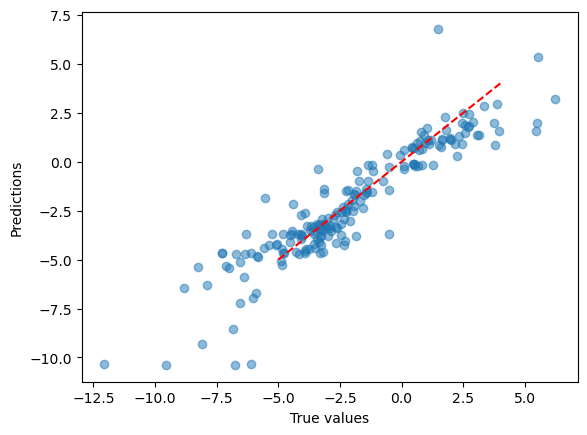

In [55]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(range(-5, 5), range(-5, 5), "r--")
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()
# 这个代码会创建一个散点图，显示模型的预测值与真实值之间的关系。
# x轴是真实值，y轴是预测值。如果模型预测完全准确，则所有点都将落在红色虚线上方，红色虚线表示完美预测的情况

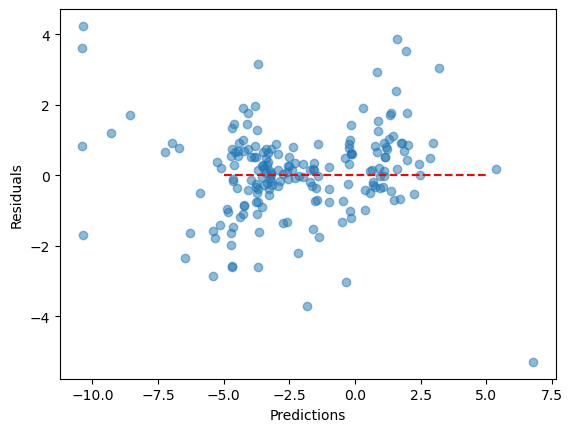

In [56]:
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.hlines(y=0, xmin=-5, xmax=5, colors='r', linestyles='--')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()
# 这个代码将创建一个散点图，表示预测值和残差之间的关系。
# x轴是预测值，y轴是残差。如果模型的预测值能够准确地预测目标变量，残差应该随机分布在0附近。

In [58]:
data_rfe1=data_rfe
data_rfe1

,Tolerance Factor,HOMO_energy,LUMO_energy,stable_ion,solar_ion,photo_ion,MagpieData mean AtomicWeight,MagpieData mean Row,MagpieData mean CovalentRadius,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mean GSvolume_pa,F,Adsorption energy(ev)
0,0.717404,-0.149882,-0.149882,0.366833,0.245629,0.213698,23.216516,2.285714,86.285714,2.841429,1.301224,13.574524,0.500,-7.004905
1,0.717404,-0.222725,-0.149882,0.315976,0.211353,0.285988,23.216516,2.285714,86.285714,2.841429,1.301224,13.574524,0.500,0.395232
2,0.717404,-0.149882,-0.149882,0.287042,0.212190,0.240783,23.216516,2.285714,86.285714,2.841429,1.301224,13.574524,0.500,-6.580689
3,0.717404,-0.149882,-0.149882,0.381328,0.263281,0.248083,23.216516,2.285714,86.285714,2.841429,1.301224,13.574524,0.500,-5.557395
4,0.717404,-0.149882,-0.149882,0.241039,0.246650,0.313555,23.216516,2.285714,86.285714,2.841429,1.301224,13.574524,0.500,2.608437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.797616,-0.144450,-0.144450,0.381328,0.263281,0.248083,87.765791,4.428571,151.571429,2.177143,0.837551,49.965000,0.000,-1.934356
636,0.797616,-0.144450,-0.144450,0.241039,0.246650,0.313555,87.765791,4.428571,151.571429,2.177143,0.837551,49.965000,0.000,-0.151069
637,0.797616,-0.144450,-0.144450,0.336066,0.178890,0.179321,87.765791,4.428571,151.571429,2.177143,0.837551,49.965000,0.000,-4.757395
638,0.797616,-0.175427,-0.144450,0.415391,0.097620,0.164341,87.765791,4.428571,151.571429,2.177143,0.837551,49.965000,0.000,-0.462000


In [60]:
data_rfe_delete = pd.read_csv('data_rfe_delete5and-10.csv')

X = data_rfe_delete.values[:, :-1]
y = data_rfe_delete.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)


for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])



for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [61]:
feature_names = list(data_rfe.columns[:-1])

In [62]:
# 定义符号回归模型，并使用训练数据拟合模型
from gplearn.genetic import SymbolicRegressor
reg_delete = SymbolicRegressor(population_size=5000, generations=50, verbose=1,
                         function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 
                                       'inv', 'max', 'min', 'sin', 'cos', 'tan'],
                         metric='mean absolute error', stopping_criteria=0.001,
                         random_state=0)
reg_delete.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     9.07           4.8374        3          2.01192              N/A      1.90m
   1     8.46          3.01535        8          1.72285              N/A      1.63m
   2    11.64          2.83511       22           1.4153              N/A      2.19m
   3    13.67          2.70464       22           1.4153              N/A      1.90m
   4    14.90          2.56729       15           1.3088              N/A      2.02m
   5    16.09          2.35245       26          1.27029              N/A      1.93m
   6    20.18          2.28823       20          1.26681              N/A      1.97m
   7    23.74          2.18847       37           1.1911              N/A      2.02m
   8    23.57          1.97817       67          1.09627              N/A  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv', 'max', 'min', 'sin', 'cos',
                                'tan'],
                  generations=50, population_size=5000, random_state=0,
                  stopping_criteria=0.001, verbose=1)

In [63]:
from sklearn.metrics import mean_absolute_error
# 预测测试数据
y_pred = reg_delete.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 1.05702374927112


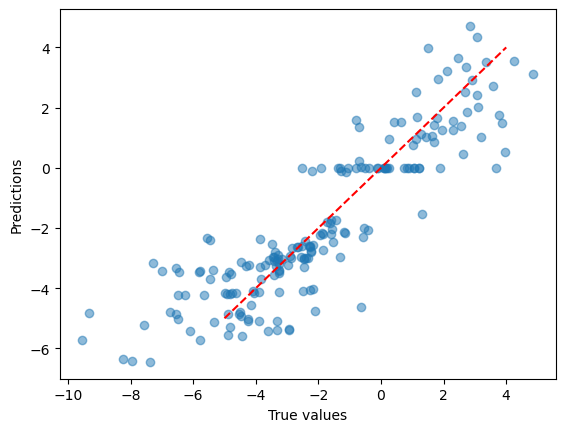

In [64]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(range(-5, 5), range(-5, 5), "r--")
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()
# 这个代码会创建一个散点图，显示模型的预测值与真实值之间的关系。
# x轴是真实值，y轴是预测值。如果模型预测完全准确，则所有点都将落在红色虚线上方，红色虚线表示完美预测的情况

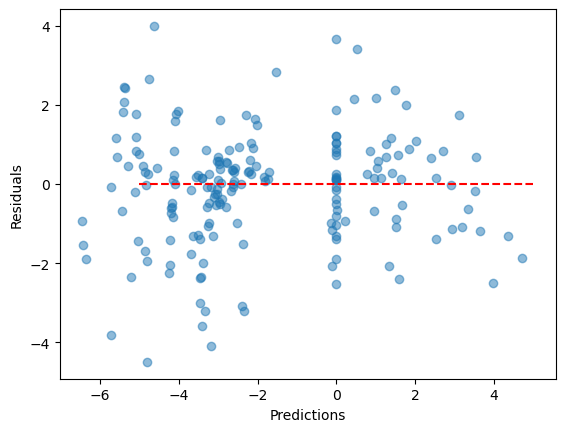

In [65]:
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.hlines(y=0, xmin=-5, xmax=5, colors='r', linestyles='--')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()
# 这个代码将创建一个散点图，表示预测值和残差之间的关系。
# x轴是预测值，y轴是残差。如果模型的预测值能够准确地预测目标变量，残差应该随机分布在0附近。

In [19]:
def tSR_default(r_thresh):
    import numpy as np
    X = data_rfe.values[:, :-1]
    y = data_rfe.values[:, -1]
    for i in range(0,(data_rfe.shape[1]-1)):
         for j in range(0,(data_rfe.shape[1]-1)):
              for k in range(0,(data_rfe.shape[1]-1)):
                    for n in range(0,(data_rfe.shape[1]-1)):
                         px=(X[:,i]-X[:,j])*(X[:,k]-X[:,n])
                         per=np.corrcoef(px, y)
                         if per[0,1]>r_thresh or per[0,1]< -1 * r_thresh:
                              print(per[0,1])
                              print(i,j,k,n)
                              print(data_rfe.columns.values.tolist()[i],data_rfe.columns.values.tolist()[j],data_rfe.columns.values.tolist()[k],data_rfe.columns.values.tolist()[n])
                              print('(',data_rfe.columns.values.tolist()[i],'-',data_rfe.columns.values.tolist()[j],')','*','(',data_rfe.columns.values.tolist()[k],'-',data_rfe.columns.values.tolist()[n],')')
                              print('**********************************************')
                              with open(path+"/data.txt", "a+") as f:
                                  f.write(str(per[0,1])+"\n")
                                  f.write(str(i)+" "+str(j)+" "+str(k)+" "+str(n)+"\n")
                                  f.write(str(data_rfe.columns.values.tolist()[i])+" "
                                          +str(data_rfe.columns.values.tolist()[j])+" "
                                          +str(data_rfe.columns.values.tolist()[k])+" "
                                          +str(data_rfe.columns.values.tolist()[n])+"\n")
                                  f.write("( "+str(data_rfe.columns.values.tolist()[i]) + " - "
                                          + str(data_rfe.columns.values.tolist()[j]) + " ) * ("
                                          + str(data_rfe.columns.values.tolist()[k]) + " - "
                                          + str(data_rfe.columns.values.tolist()[n]) + " )\n")
                                  f.write('**********************************************\n')

tSR_default(0.8)

C:\Users\DELL\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\DELL\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
def tSR_tan(r_thresh):
    import numpy as np
    X = data_rfe.values[:, :-1]
    y = data_rfe.values[:, -1]
    for i in range(0,(data_rfe.shape[1]-1)):
     for j in range(0,(data_rfe.shape[1]-1)):
      for k in range(0,(data_rfe.shape[1]-1)):
        for n in range(0,(data_rfe.shape[1]-1)):
         px=(X[:,i]-X[:,j])*(X[:,k]-X[:,n])
         per=np.corrcoef(px, y)
         if per[0,1]>r_thresh or per[0,1] < -1 * r_thresh:
          print(per[0,1])
          print(i,j,k,n)
          print(data.columns.values.tolist()[i],data.columns.values.tolist()[j],data.columns.values.tolist()[k],data.columns.values.tolist()[n])
          print('(',data.columns.values.tolist()[i],'-',data.columns.values.tolist()[j],')','*','(',data.columns.values.tolist()[k],'-',data.columns.values.tolist()[n],')')
          print('**********************************************')
tSR_tan(0.8)